<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-first-run" data-toc-modified-id="Simple-first-run-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple first run</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple first run

1. Iniatilize NxN grid
2. Compute the initial energy $E$
3. Flip random spin and compute $\Delta E$
4. Accept or reject based on criteria
5. Continue to 3

In [138]:
# Insight from using full energy
np.seterr(over='raise')

{'divide': 'warn', 'over': 'raise', 'under': 'ignore', 'invalid': 'warn'}

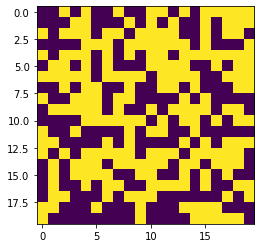

In [139]:
N = 20
grid = np.random.randint(low=0, high=2, size=(N, N))
plt.imshow(grid)
# Rescale to +-1
grid = -1 + 2*grid

Starting energy 80
0.36787944117144233 10
reject
0.36787944117144233 10
90
0.36787944117144233 10
100
0.36787944117144233 10
110
1 -10
100
1 -10
90
1 -10
80
1 -10
70
1 -10
60
0.36787944117144233 10
70
1 -10
60
0.36787944117144233 10
reject
0.36787944117144233 10
70
1 -10
60
0.36787944117144233 10
70
0.36787944117144233 10
reject
0.36787944117144233 10
80
1 -10
70
0.36787944117144233 10
reject
1 -10
60
1 -10
50
0.36787944117144233 10
reject
0.36787944117144233 10
reject
1 -10
40
1 -10
30
1 -10
20
1 -10
10
0.36787944117144233 10
reject
1 -10
0
0.36787944117144233 10
reject
1 -10
-10
0.36787944117144233 10
reject
1 -10
-20
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
-10
0.36787944117144233 10
0
1 -10
-10
1 -10
-20
1 -10
-30
1 -10
-40
0.36787944117144233 10
reject
1 -10
-50
0.36787944117144233 10
reject
0.36787944117144233 10
reject
1 -10
-60
0.36787944117144233 10
-50
1 -10
-60
1 -10
-70
0.36787944117144233 10
reject
1 -10
-80
1 -10
-90
1 -10
-100
1 

1 -10
-770
1 -10
-780
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
-770
1 -10
-780
1 -10
-790
0.36787944117144233 10
reject
0.36787944117144233 10
reject
1 -10
-800
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
-790
1 -10
-800
0.36787944117144233 10
reject
0.36787944117144233 10
-790
0.36787944117144233 10
reject
1 -10
-800
0.36787944117144233 10
reject
1 -10
-810
0.36787944117144233 10
reject
1 -10
-820
0.36787944117144233 10
reject
0.36787944117144233 10
reject
1 -10
-830
0.36787944117144233 10
reject
1 -10
-840
0.36787944117144233 10
reject
0.36787944117144233 10
-830
0.36787944117144233 10
reject
0.36787944117144233 10
reject
0.36787944117144233 10
reject
1 -10
-840
0.36787944117144233 10
reject
1 -10
-850
1 -10
-860
1 -10
-870
0.36787944117144233 10
reject
1 -10
-880
0.36787944117144233 10
reject
0.36787944117144233 10
-870
0.36787944117144233 10
r

1 -10
-1000


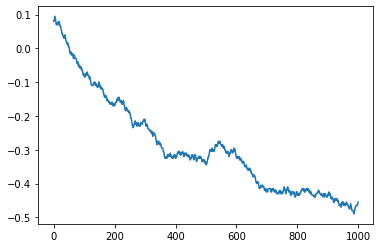

In [140]:
beta = 1/10

# This is not efficient, but is clear to read
E = 0
e_0 = 5
for i in range(N):
    for j in range(N):
        E += e_0*int(grid[i,j] * grid[(i+1)%N, j])
        E += e_0*int(grid[i,j] * grid[i-1, j])
        E += e_0*int(grid[i,j] * grid[i, (j+1)%N])
        E += e_0*int(grid[i,j] * grid[i, j-1])

        
averages = []
print('Starting energy', E)
for n in range(int(1e3)):
    averages.append(np.mean(grid))
    i, j = (np.random.randint(0, N, size=(2,)))
    x = grid[i, j]
    grid[i, j] = - x
    dE = 0
    dE += x * grid[(i+1)%20, j]
    dE += x * grid[i-1, j]
    dE += x * grid[i, (j+1)%20]
    dE += x * grid[i, j-1]
    dE = x
    dE *= -2*e_0
    
    accept_p = min(1, np.exp(-beta*dE))
    print(accept_p, dE)
    
    if accept_p>np.random.rand():
        E = E + dE
        print(E)
    else:
        #reset it back
        print('reject')
        grid[i, j] = x
    
plt.plot(averages) 

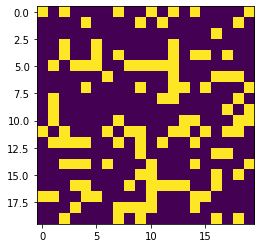

In [137]:
plt.imshow(grid)

In [132]:
# Insight from using full energy
np.seterr(over='raise')
np.exp(6000)

FloatingPointError: overflow encountered in exp